# About "Demand Forecasting"

1. Demand Forecasting is the process in which historical sales data is used to develop an estimate of an expected forecast of customer demand. 
2. It provides an estimate of the amount of goods and services that its customers will purchase in the foreseeable future.
3. Critical business assumptions like turnover, profit margins, cash flow, capital expenditure, risk assessment and mitigation plans, capacity planning, etc. are dependent on Demand Forecasting.
4. Based on the Demand Forecast, strategic and long-range plans of a business like budgeting, financial planning, sales and marketing plans, capacity planning, risk assessment and mitigation plans are formulated.



# 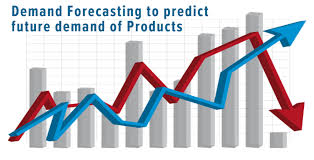

# Problem Statement

One of the largest retail chains in the world wants to use their vast data source to build an efficient forecasting model to predict the sales for each SKU in its portfolio at its *76 different stores* using historical sales data for the *past 3 years on a week-on-week basis*. 

# End Goal

1. Build a model which accurately predicts the future sales of the company 
2. Save the best model(.pkl)


In [1]:
#Importing necessary libraries
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #linear algebra
import scipy.stats as s

In [2]:
#LOADING THE DATA
data=pd.read_csv("DForecast.csv")

In [3]:
#First 10 rows of our "data"
data.head(10)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
5,9,17/01/11,8091,219009,227.2875,227.2875,0,0,18
6,10,17/01/11,8091,219029,327.0375,327.0375,0,0,47
7,13,17/01/11,8091,223245,210.9000,210.9000,0,0,50
8,14,17/01/11,8091,223153,190.2375,234.4125,1,1,82
9,17,17/01/11,8095,216418,99.0375,99.0375,0,0,99


In [4]:
data.info()#to get column info like dtype, missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [5]:
data.isnull().sum()#to get no.of null values column-wise

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

*We have 1 missing value in total_price*

In [6]:
data[data['total_price'].isnull()]#row 136949 

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,23/04/13,9436,245338,NaN,469.5375,0,0,1


        Only 1,  Can handle it later or drop this row

### Working with datetime type of data: Feature Engineering

In [7]:
data['week']=pd.DatetimeIndex(data['week'])#changing data type of week from "object" to "datetime64"

In [8]:
#Grab all possible information like Year, Month/Day/Week number
data['week_year']=data['week'].dt.year
data['week_month']=data['week'].dt.month
data['week_day']=data['week'].dt.day
data['week_no']=data['week'].dt.week

In [9]:
#Now, since we have taken all info from "week" it can be dropped
data.drop(['week'],axis=1,inplace=True)

In [10]:
data.head(10)

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week_year,week_month,week_day,week_no
0,1,8091,216418,99.0375,111.8625,0,0,20,2011,1,17,3
1,2,8091,216419,99.0375,99.0375,0,0,28,2011,1,17,3
2,3,8091,216425,133.9500,133.9500,0,0,19,2011,1,17,3
3,4,8091,216233,133.9500,133.9500,0,0,44,2011,1,17,3
4,5,8091,217390,141.0750,141.0750,0,0,52,2011,1,17,3
5,9,8091,219009,227.2875,227.2875,0,0,18,2011,1,17,3
6,10,8091,219029,327.0375,327.0375,0,0,47,2011,1,17,3
7,13,8091,223245,210.9000,210.9000,0,0,50,2011,1,17,3
8,14,8091,223153,190.2375,234.4125,1,1,82,2011,1,17,3
9,17,8095,216418,99.0375,99.0375,0,0,99,2011,1,17,3


In [11]:
data['discount']=data['base_price']-data['total_price']#discount can add to the insights

### Univariate Analysis

In [12]:
data['store_id'].unique(),data['store_id'].nunique()#76 unique stores

(array([8091, 8095, 8094, 8063, 8023, 8058, 8222, 8121, 8218, 8317, 8319,
        8392, 8398, 8400, 8422, 8438, 8555, 8562, 8869, 8991, 8911, 9001,
        9043, 9092, 9112, 9132, 9147, 9164, 9178, 9190, 9221, 9250, 9273,
        9279, 9281, 9328, 9371, 9442, 9430, 9439, 9425, 9432, 9436, 9456,
        9479, 9481, 9490, 9498, 9532, 9578, 9672, 9611, 9613, 9632, 9680,
        9700, 9713, 9731, 9745, 9770, 9789, 9813, 9823, 9837, 9809, 9845,
        9872, 9876, 9879, 9880, 9881, 9890, 9909, 9954, 9961, 9984],
       dtype=int64),
 76)

In [13]:
data['sku_id'].nunique()#28 unique products

28

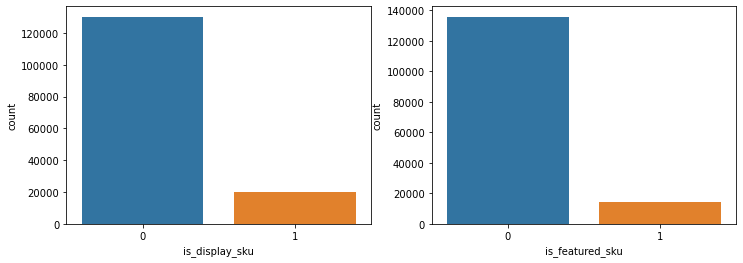

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data.is_display_sku)
plt.subplot(1,2,2)
sns.countplot(data.is_featured_sku)

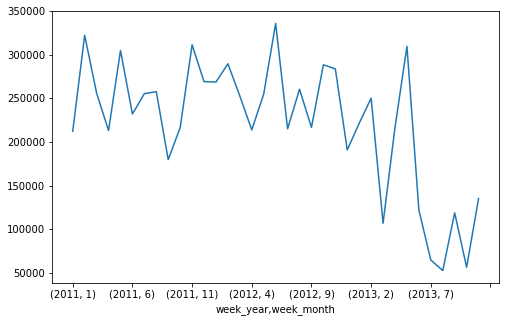

In [15]:
data.groupby(by=[data.week_year,data.week_month]).sum()['units_sold'].plot(figsize=(8,5))

C:\Users\Ronak\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


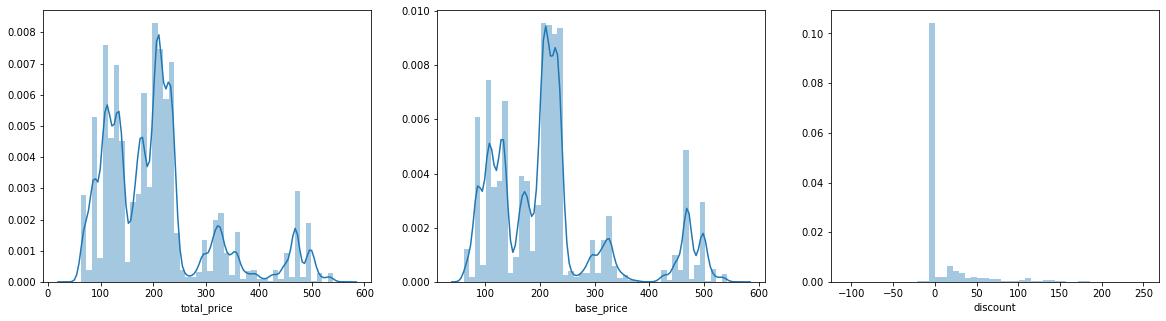

In [16]:
#Distribution plot for numerical features in X
num_features=['total_price','base_price','discount']
j=1
plt.figure(figsize=(20,5))
for i in num_features:
    plt.subplot(1,3,j)
    sns.distplot(data[i])
    j=j+1
    if j==4:
        break

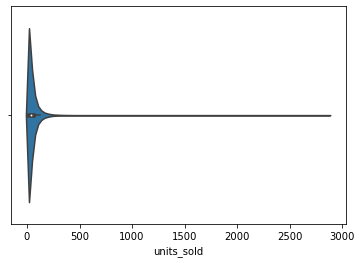

In [17]:
#Target variable i.e "units_sold" distribution
sns.boxplot(data['units_sold'])

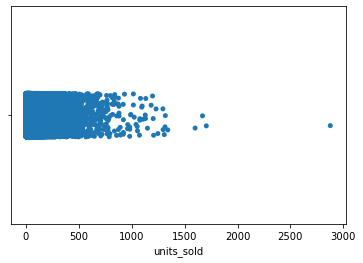

In [18]:
sns.stripplot(data['units_sold'])

##### Let's group data by storeID(basically store) 

In [19]:
s_id=data.groupby(by=[data.store_id,data.sku_id])#group by store_id then sku_id

In [20]:
s_id['units_sold'].sum().sort_values(ascending=False).head(20)

store_id  sku_id
8023      216418    32289
          219009    31515
9613      216418    31434
9273      216418    31413
9845      219009    30952
8023      217390    30391
          216419    28968
9845      216418    28640
9823      219009    27362
9112      216418    26687
9250      216418    26544
9611      216418    26519
8023      222087    26020
9613      216419    25670
9112      219009    23883
9845      223245    23634
9112      216419    23166
8222      219009    22952
          216418    22634
9845      216419    22095
Name: units_sold, dtype: int64

*sku_id 216418, 216419 & 219009 are quite popular in each store & pushed in huge quantities*

In [21]:
#Total Units_sold by store_id
data.groupby(by=data.store_id)['units_sold'].sum().sort_values(ascending=False).head(10)

store_id
8023    296478
9845    261410
9823    233846
9112    218127
9613    205710
8222    197509
9611    196565
8095    191277
9250    168072
9961    156392
Name: units_sold, dtype: int64

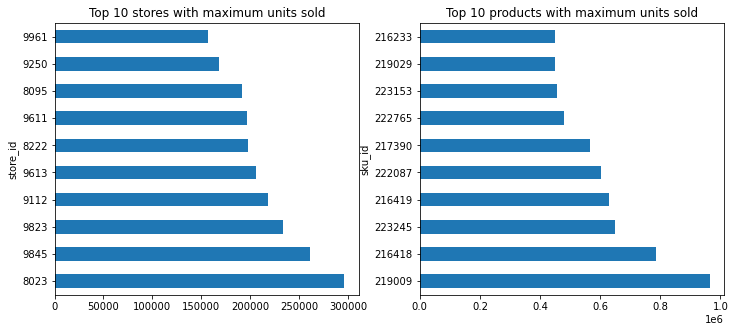

In [22]:
#Plotting stores/products with max units sold
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
data.groupby(by=data.store_id)['units_sold'].sum().sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Top 10 stores with maximum units sold")
plt.subplot(1,2,2)
data.groupby(by=data.sku_id)['units_sold'].sum().sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Top 10 products with maximum units sold")
plt.show()

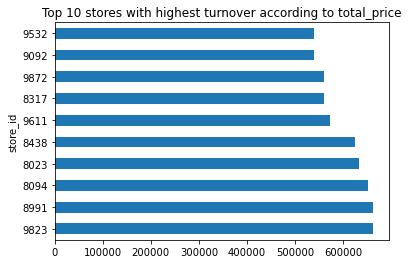

In [23]:
#Plotting max turnover stores
data.groupby(by=data.store_id)['total_price'].sum().sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Top 10 stores with highest turnover according to total_price")
plt.show()

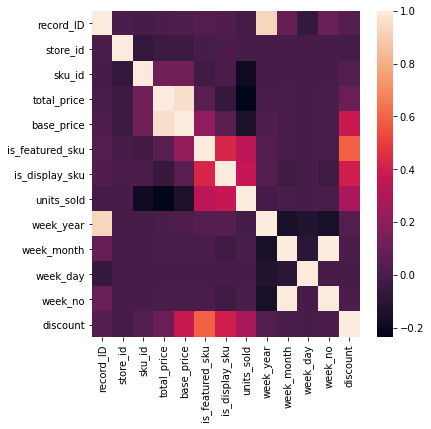

In [24]:
#Checking corr within variables
plt.figure(figsize=(6,6))
sns.heatmap(data.corr())

#### Understanding units_sold(TARGET variable)

In [25]:
data['units_sold'].describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

In [26]:
data.skew(axis=0,skipna=True)

record_ID          0.001126
store_id          -0.636176
sku_id             3.048709
total_price        1.250565
base_price         1.208992
is_featured_sku    2.750438
is_display_sku     2.158996
units_sold         6.114996
week_year          0.291034
week_month         0.166137
week_day           0.007563
week_no            0.182847
discount           3.055019
dtype: float64

Since, units_sold is highly skewed(which is usual), lets analyze > 500 units_sold data(outliers) 

In [27]:
units_500=data[data['units_sold']>500]
units_500.shape

(305, 13)

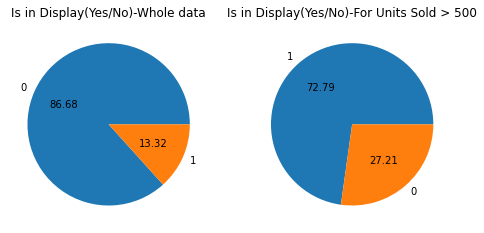

In [28]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.pie(data['is_display_sku'].value_counts(),labels=data['is_display_sku'].value_counts().index,autopct="%.2f")
plt.title("Is in Display(Yes/No)-Whole data")
plt.subplot(1,2,2)
plt.pie(units_500['is_display_sku'].value_counts(),labels=units_500['is_display_sku'].value_counts().index,autopct="%.2f")
plt.title("Is in Display(Yes/No)-For Units Sold > 500")
plt.show()

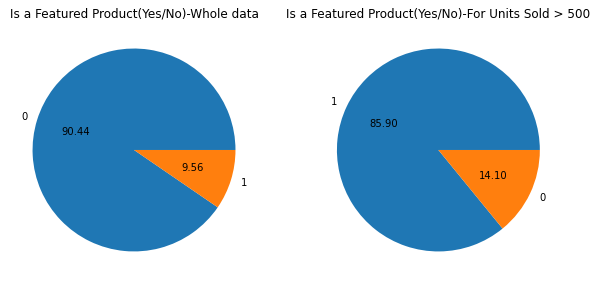

In [29]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.pie(data['is_featured_sku'].value_counts(),labels=data['is_featured_sku'].value_counts().index,autopct="%.2f")
plt.title("Is a Featured Product(Yes/No)-Whole data")
plt.subplot(1,2,2)
plt.pie(units_500['is_featured_sku'].value_counts(),labels=units_500['is_featured_sku'].value_counts().index,autopct="%.2f")
plt.title("Is a Featured Product(Yes/No)-For Units Sold > 500")
plt.show()

In [30]:
units_500[units_500['discount']>0]

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week_year,week_month,week_day,week_no,discount
4636,6580,8095,219009,117.5625,227.2875,1,1,1207,2011,2,14,7,109.7250
4657,6605,8094,219009,118.2750,227.2875,1,1,681,2011,2,14,7,109.0125
4677,6629,8063,219009,116.8500,227.2875,1,1,533,2011,2,14,7,110.4375
4697,6656,8023,219009,118.2750,227.2875,1,1,1247,2011,2,14,7,109.0125
4698,6657,8023,219029,175.9875,327.0375,0,1,623,2011,2,14,7,151.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149074,211108,8023,222087,164.5875,211.6125,1,1,575,2013,9,7,36,47.0250
149294,211422,8869,222087,162.4500,199.5000,1,1,591,2013,9,7,36,37.0500
149384,211543,9112,222087,163.1625,208.0500,1,1,664,2013,9,7,36,44.8875
149799,212142,9613,222087,163.1625,213.7500,1,1,542,2013,9,7,36,50.5875


It is clear that the *units_sold>500* data comprises majorly of *discounted & featured* products 

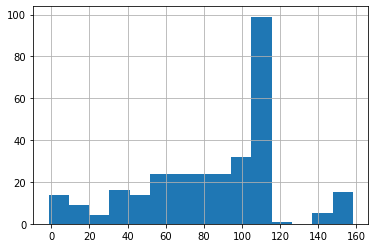

In [31]:
units_500['discount'].hist(bins=15)#A negative skew data

#### Bivariate Analysis- With TARGET & any other variable

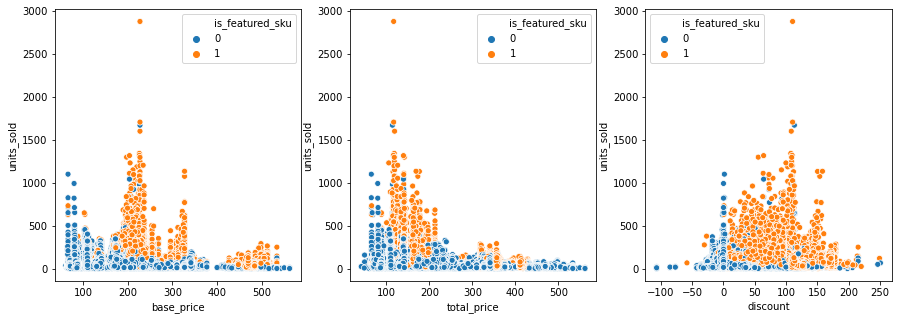

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x="base_price",y="units_sold",hue="is_featured_sku",data=data)
plt.subplot(1,3,2)
sns.scatterplot(x="total_price",y="units_sold",hue="is_featured_sku",data=data)
plt.subplot(1,3,3)
sns.scatterplot(x="discount",y="units_sold",hue="is_featured_sku",data=data)
plt.show()

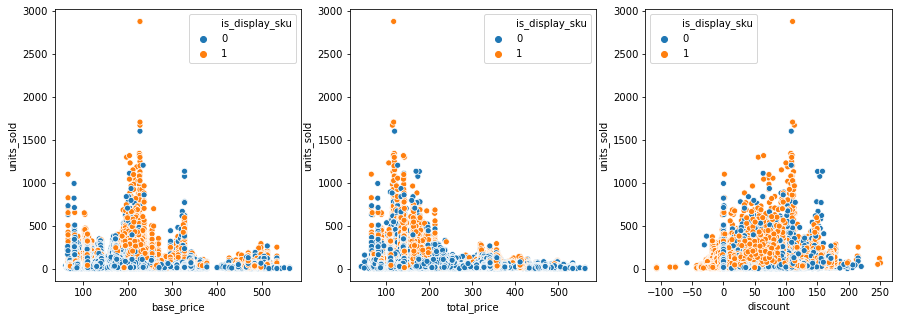

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x="base_price",y="units_sold",hue="is_display_sku",data=data)
plt.subplot(1,3,2)
sns.scatterplot(x="total_price",y="units_sold",hue="is_display_sku",data=data)
plt.subplot(1,3,3)
sns.scatterplot(x="discount",y="units_sold",hue="is_display_sku",data=data)
plt.show()

# Data PreProcessing

### 1. Missing Values

In [34]:
data[data['total_price'].isnull()]#row 136949 

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week_year,week_month,week_day,week_no,discount
136949,193915,9436,245338,NaN,469.5375,0,0,1,2013,4,23,17,NaN


In [35]:
#Predicting the missing value
data[(data.sku_id==245338) & (data.store_id==9436) & (data.base_price==469.5375)]['discount'].value_counts()

0.0000      64
114.0000    15
151.0500     6
129.6750     5
145.3500     2
77.6625      1
52.0125      1
153.1875     1
66.9750      1
68.4000      1
116.8500     1
149.6250     1
111.8625     1
70.5375      1
143.9250     1
Name: discount, dtype: int64

In [36]:
data['total_price'].mean(skipna=True)#check mean

206.6267510108051

In [37]:
#Instead of mean, it is more appropriate to fill total_price with corresponding base_price
data.fillna(469.5375,inplace=True)

In [38]:
data['total_price'].describe()#DONE, Now no null values

count    150150.000000
mean        206.628502
std         103.310400
min          41.325000
25%         130.387500
50%         198.075000
75%         233.700000
max         562.162500
Name: total_price, dtype: float64

### Target Encoding 

In [39]:
data['store_id'].nunique(),data['sku_id'].nunique()

(76, 28)

*This 2 features have high cardinality (huge no. of categories), which is why one hot encoding is inappropriate*

In [40]:
#Target based encoding of "store_id"
storeid_map=data.groupby(by=data['store_id']).mean()['units_sold'].to_dict()
data['store_id']=data['store_id'].replace(storeid_map)

In [41]:
#Target based encoding of "sku_id"
skuid_map=data.groupby(by=data['sku_id']).mean()['units_sold'].to_dict()
data['sku_id']=data['sku_id'].replace(skuid_map)

In [42]:
data['store_id'].nunique(),data['sku_id'].nunique()

(76, 28)

In [43]:
data

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week_year,week_month,week_day,week_no,discount
0,1,32.805983,88.923869,99.0375,111.8625,0,0,20,2011,1,17,3,12.8250
1,2,32.805983,72.182664,99.0375,99.0375,0,0,28,2011,1,17,3,0.0000
2,3,32.805983,34.019231,133.9500,133.9500,0,0,19,2011,1,17,3,0.0000
3,4,32.805983,46.821206,133.9500,133.9500,0,0,44,2011,1,17,3,0.0000
4,5,32.805983,62.312747,141.0750,141.0750,0,0,52,2011,1,17,3,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,37.853394,68.510537,235.8375,235.8375,0,0,38,2013,9,7,36,0.0000
150146,212639,37.853394,60.407560,235.8375,235.8375,0,0,30,2013,9,7,36,0.0000
150147,212642,37.853394,33.212139,357.6750,483.7875,1,1,31,2013,9,7,36,126.1125
150148,212643,37.853394,21.838213,141.7875,191.6625,0,1,12,2013,9,7,36,49.8750


### 2. Split to Independent-Dependent variables

In [44]:
x=data.drop('units_sold',axis=1)
y=data['units_sold']

##### LOG TRANSFORMATION TO TREAT OUTLIERS-  *To do*

### 3. Encoding Categorical Variables

In [45]:
x.drop('record_ID',axis=1,inplace=True)

In [46]:
x.head(10)

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,week_year,week_month,week_day,week_no,discount
0,32.805983,88.923869,99.0375,111.8625,0,0,2011,1,17,3,12.825
1,32.805983,72.182664,99.0375,99.0375,0,0,2011,1,17,3,0.000
2,32.805983,34.019231,133.9500,133.9500,0,0,2011,1,17,3,0.000
3,32.805983,46.821206,133.9500,133.9500,0,0,2011,1,17,3,0.000
4,32.805983,62.312747,141.0750,141.0750,0,0,2011,1,17,3,0.000
5,32.805983,98.891692,227.2875,227.2875,0,0,2011,1,17,3,0.000
6,32.805983,47.477661,327.0375,327.0375,0,0,2011,1,17,3,0.000
7,32.805983,68.510537,210.9000,210.9000,0,0,2011,1,17,3,0.000
8,32.805983,60.407560,190.2375,234.4125,1,1,2011,1,17,3,44.175
9,81.742308,88.923869,99.0375,99.0375,0,0,2011,1,17,3,0.000


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ct=ColumnTransformer(transformers=[('oh',ohe,[6])],remainder="passthrough")
x=ct.fit_transform(x)#Encoding "week_year"
x=x[:,1:]

In [48]:
x
y=y.values

### 4. Train-Test Split

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

### 5. Model Building

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

### Decision tree

In [51]:
#Building a decision tree model
dtr=DecisionTreeRegressor(criterion='mse',max_depth=27,max_features='auto',min_samples_leaf=10,min_samples_split=90)
dtr.fit(x_train,y_train)
y_pred_train_dt=dtr.predict(x_train)
y_pred_dt=dtr.predict(x_test)

In [52]:
r2_score(y_test,y_pred_dt),r2_score(y_train,y_pred_train_dt)# Test & Train r2 score

(0.7510470254873274, 0.7833263200442051)

In [53]:
#Hyperparam Tuning
dt=DecisionTreeRegressor()
max_features=['auto','sqrt','log2']
max_depth=np.linspace(5,35,5,dtype="int")
min_samples_split=[2,5,10,15,20,30,40,50,70,90,100]
min_samples_leaf=[1,2,4,6,10]
criterion=['mse']
#Defining parameters to tweak
parameters={"max_features":max_features,"max_depth":max_depth,"min_samples_split":min_samples_split,
           "min_samples_leaf":min_samples_leaf,"criterion":criterion}
gsv=GridSearchCV(dt,param_grid=parameters,scoring="r2",cv=5,n_jobs=-1,verbose=5)
gsv.fit(x,y)

Fitting 5 folds for each of 825 candidates, totalling 4125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.1s


KeyboardInterrupt: 

In [ ]:
gsv.best_params_#getting the best parameter

In [ ]:
gsv.best_score_#getting the best score

In [54]:
dtr.feature_importances_#Importance taken by the model of features

array([0.0035484 , 0.00316501, 0.28153563, 0.28043939, 0.06914423,
       0.01057178, 0.08483203, 0.16608114, 0.00126551, 0.00574691,
       0.01898298, 0.07468698])

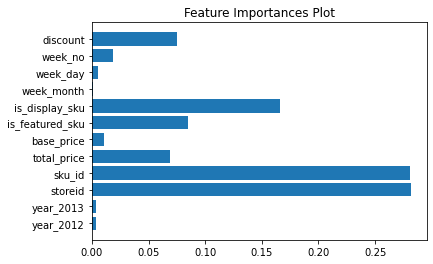

In [55]:
plt.barh(y=['year_2012','year_2013','storeid','sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku','week_month', 'week_day', 'week_no', 'discount'], width=dtr.feature_importances_)
plt.title("Feature Importances Plot")
plt.show()

### Random Forest

In [56]:
#Building Random Forest model with 10 decision trees
rf=RandomForestRegressor(n_estimators=10,criterion='mse',bootstrap=True,random_state=10,
                         max_depth=27,max_features='auto',min_samples_leaf=10,min_samples_split=90)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
y_pred_train_rf=rf.predict(x_train)

In [57]:
r2_score(y_test,y_pred_rf),r2_score(y_train,y_pred_train_rf)#Test & Train r2 score

(0.7755424130170276, 0.7867292137913567)

### XGBoost

In [58]:
gb=xgb.XGBRegressor()

In [59]:
#Defining parameters dict for hyperparam tuning
param={'eta':[0.3],
       'learning_rate':[0.03],
      'max_depth':[7],
      'min_child_weight':[4,6,8],'n_estimators':[100]}
xgb_grid=GridSearchCV(gb,param_grid=param,scoring='r2',cv=2,n_jobs=-1,verbose=5)

In [60]:
xgb_grid.fit(x_train,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   32.4s remaining:   32.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   56.4s finished


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [61]:
xgb_grid.best_params_#Getting the best parameters

{'eta': 0.3,
 'learning_rate': 0.03,
 'max_depth': 7,
 'min_child_weight': 6,
 'n_estimators': 100}

In [62]:
#Applying the best params obtained from HyperparamTuning
gbm=xgb.XGBRegressor(eta=0.3,learning_rate=0.07,max_depth=7,min_child_weight=6,n_estimators=100)

In [63]:
gbm.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=7,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
y_pred_gb=gbm.predict(x_test)
y_pred_train_gb=gbm.predict(x_train)

In [65]:
r2_score(y_test,y_pred_gb),r2_score(y_train,y_pred_train_gb)

(0.8190385024676173, 0.8546260217513164)

In [66]:
gbm.feature_importances_

array([0.00980481, 0.0110597 , 0.07463446, 0.10865591, 0.03780391,
       0.01231333, 0.16030002, 0.46823248, 0.02311976, 0.01837819,
       0.01837599, 0.05732145], dtype=float32)

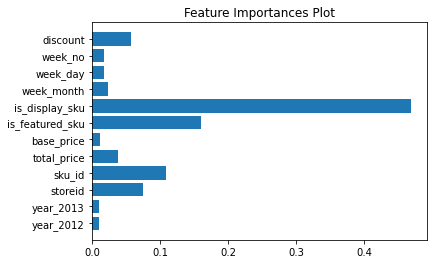

In [67]:
plt.barh(y=['year_2012','year_2013','storeid','sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku','week_month', 'week_day', 'week_no', 'discount'], width=gbm.feature_importances_)
plt.title("Feature Importances Plot")
plt.show()

## Best r2: xgBoost- 0.82(test),0.854(train)

is_display_sku, is_featured_sku, sku_id, store_id, discount, total_price have max feature importances as inferred from DT & xgBoost model 

# Saving the best model

In [68]:
import joblib

In [69]:
joblib.dump(gbm,'xgb_bestmodel.pkl')

['xgb_bestmodel.pkl']